In [1]:
!pip install infercnvpy

In [1]:
import infercnvpy as cnv
import numpy as np
import pandas as pd
import scanpy as sc
import scanpy.external as sce
import scipy
sc.settings.verbosity = 3
sc.logging.print_header()
sc.set_figure_params(dpi=100, dpi_save=600)
    
import scvelo as scv
scv.settings.verbosity = 3
scv.settings.presenter_view = True
scv.logging.print_versions()

import cellrank as cr
cr.settings.verbosity = 3
cr.logging.print_versions()

import matplotlib.pyplot as pl
from matplotlib import rcParams

/Users/gzou/opt/anaconda3/envs/PY38/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


scanpy==1.9.1 anndata==0.8.0 umap==0.5.3 numpy==1.22.4 scipy==1.8.1 pandas==1.4.2 scikit-learn==1.1.1 statsmodels==0.13.2 python-igraph==0.9.10 pynndescent==0.5.7
scvelo==0.2.4  scanpy==1.9.1  anndata==0.8.0  loompy==3.0.7  numpy==1.22.4  scipy==1.8.1  matplotlib==3.5.2  sklearn==1.1.1  pandas==1.4.2  


ERROR: XMLRPC request failed [code: -32500]
RuntimeError: PyPI no longer supports 'pip search' (or XML-RPC search). Please use https://pypi.org/search (via a browser) instead. See https://warehouse.pypa.io/api-reference/xml-rpc.html#deprecated-methods for more information.


cellrank==1.5.1 scanpy==1.9.1 anndata==0.8.0 numpy==1.22.4 numba==0.55.2 scipy==1.8.1 pandas==1.4.2 pygpcca==1.0.3 scikit-learn==1.1.1 statsmodels==0.13.2 python-igraph==0.9.10 scvelo==0.2.4 pygam==0.8.0 matplotlib==3.5.2 seaborn==0.11.2


In [2]:
raw = sc.read('/Users/gzou/OneDrive - Inside MD Anderson/GSE150290_GCandNT/for Cellchat all pts and 29 normal/all_pts_29normal_raw.h5ad')
raw

AnnData object with n_obs × n_vars = 90988 × 20022
    obs: 'batch'
    var: 'gene_ids-GSM4546300', 'gene_ids-GSM4546302', 'gene_ids-GSM4546304', 'gene_ids-GSM4546306', 'gene_ids-GSM4546308', 'gene_ids-GSM4546310', 'gene_ids-GSM4546312', 'gene_ids-GSM4546314', 'gene_ids-GSM4546316', 'gene_ids-GSM4546318', 'gene_ids-GSM4546320', 'gene_ids-GSM4546322', 'gene_ids-GSM4546324', 'gene_ids-GSM4546326', 'gene_ids-GSM4546328', 'gene_ids-GSM4546330', 'gene_ids-GSM4546332', 'gene_ids-GSM4546334', 'gene_ids-GSM4546336', 'gene_ids-GSM4546338', 'gene_ids-GSM4546340', 'gene_ids-GSM4546341', 'gene_ids-GSM4546343', 'gene_ids-GSM4546345', 'gene_ids-GSM4546347', 'gene_ids-GSM4546348', 'gene_ids-GSM4546349', 'gene_ids-GSM4546350', 'gene_ids-GSM4546351', 'gene_ids-IP_007', 'gene_ids-IP_009_1', 'gene_ids-IP_010_2', 'gene_ids-IP_031', 'gene_ids-IP_051', 'gene_ids-IP_056', 'gene_ids-IP_057', 'gene_ids-IP_062', 'gene_ids-IP_067_1', 'gene_ids-IP_070', 'gene_ids-IP_072', 'gene_ids-IP_073_1', 'gene_ids-IP_081', '

In [3]:

processed = sc.read('/Users/gzou/OneDrive - Inside MD Anderson/GSE150290_GCandNT/for Cellchat all pts and 29 normal/all_pts_29normal_cellchat_processed.h5ad')
processed

AnnData object with n_obs × n_vars = 90455 × 5000
    obs: 'batch', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_rpl', 'pct_counts_rpl', 'total_counts_rps', 'pct_counts_rps', 'leiden', 'leiden_1', 'type', 'celltype'
    var: 'gene_ids-GSM4546300', 'gene_ids-GSM4546302', 'gene_ids-GSM4546304', 'gene_ids-GSM4546306', 'gene_ids-GSM4546308', 'gene_ids-GSM4546310', 'gene_ids-GSM4546312', 'gene_ids-GSM4546314', 'gene_ids-GSM4546316', 'gene_ids-GSM4546318', 'gene_ids-GSM4546320', 'gene_ids-GSM4546322', 'gene_ids-GSM4546324', 'gene_ids-GSM4546326', 'gene_ids-GSM4546328', 'gene_ids-GSM4546330', 'gene_ids-GSM4546332', 'gene_ids-GSM4546334', 'gene_ids-GSM4546336', 'gene_ids-GSM4546338', 'gene_ids-GSM4546340', 'gene_ids-GSM4546341', 'gene_ids-GSM4546343', 'gene_ids-GSM4546345', 'gene_ids-GSM4546347', 'gene_ids-GSM4546348', 'gene_ids-GSM4546349', 'gene_ids-GSM4546350', 'gene_ids-GSM4546351', 'gene_ids-IP_007', 'gene_ids-IP_009_1', 'gene_ids-IP_01

In [4]:
raw.obs['leiden_1']= processed.obs['leiden_1']
adata=raw[raw.obs['leiden_1'].isin(['Epi 1',
                    'Naive T1',
                    'Epi 2',
                    'Effector T1',
                    'Epi 3',
                    'Epi 4',
                    'Epi 5',
                    'Epi 6',
                    'Epi 7',
                    'Epi 8',
                    'Effector T2',
                    'Epi 9',
                    'Epi 10',
                    'Myeloid',
                    'Epi 11',
                    'Plasma cell',
                    'Fibroblast',
                    'B cell',
                    'Epi 12',
                    'Epi 13',
                    'Epi 14',
                    'Endothelial',
                    'Epi 15',
                    'Naive T2',
                    'Exhausted T',
                    'Naive T3',
                    'Naive T4',
                    'Epi 16'])]
adata

View of AnnData object with n_obs × n_vars = 90455 × 20022
    obs: 'batch', 'leiden_1'
    var: 'gene_ids-GSM4546300', 'gene_ids-GSM4546302', 'gene_ids-GSM4546304', 'gene_ids-GSM4546306', 'gene_ids-GSM4546308', 'gene_ids-GSM4546310', 'gene_ids-GSM4546312', 'gene_ids-GSM4546314', 'gene_ids-GSM4546316', 'gene_ids-GSM4546318', 'gene_ids-GSM4546320', 'gene_ids-GSM4546322', 'gene_ids-GSM4546324', 'gene_ids-GSM4546326', 'gene_ids-GSM4546328', 'gene_ids-GSM4546330', 'gene_ids-GSM4546332', 'gene_ids-GSM4546334', 'gene_ids-GSM4546336', 'gene_ids-GSM4546338', 'gene_ids-GSM4546340', 'gene_ids-GSM4546341', 'gene_ids-GSM4546343', 'gene_ids-GSM4546345', 'gene_ids-GSM4546347', 'gene_ids-GSM4546348', 'gene_ids-GSM4546349', 'gene_ids-GSM4546350', 'gene_ids-GSM4546351', 'gene_ids-IP_007', 'gene_ids-IP_009_1', 'gene_ids-IP_010_2', 'gene_ids-IP_031', 'gene_ids-IP_051', 'gene_ids-IP_056', 'gene_ids-IP_057', 'gene_ids-IP_062', 'gene_ids-IP_067_1', 'gene_ids-IP_070', 'gene_ids-IP_072', 'gene_ids-IP_073_1', 

In [5]:
adata.uns['leiden_1_colors']=processed.uns['leiden_1_colors']
adata.obsm['X_umap']=processed.obsm['X_umap']
adata.obs['type']=processed.obs['type']

adata

/Users/gzou/opt/anaconda3/envs/PY38/lib/python3.8/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value


AnnData object with n_obs × n_vars = 90455 × 20022
    obs: 'batch', 'leiden_1', 'type'
    var: 'gene_ids-GSM4546300', 'gene_ids-GSM4546302', 'gene_ids-GSM4546304', 'gene_ids-GSM4546306', 'gene_ids-GSM4546308', 'gene_ids-GSM4546310', 'gene_ids-GSM4546312', 'gene_ids-GSM4546314', 'gene_ids-GSM4546316', 'gene_ids-GSM4546318', 'gene_ids-GSM4546320', 'gene_ids-GSM4546322', 'gene_ids-GSM4546324', 'gene_ids-GSM4546326', 'gene_ids-GSM4546328', 'gene_ids-GSM4546330', 'gene_ids-GSM4546332', 'gene_ids-GSM4546334', 'gene_ids-GSM4546336', 'gene_ids-GSM4546338', 'gene_ids-GSM4546340', 'gene_ids-GSM4546341', 'gene_ids-GSM4546343', 'gene_ids-GSM4546345', 'gene_ids-GSM4546347', 'gene_ids-GSM4546348', 'gene_ids-GSM4546349', 'gene_ids-GSM4546350', 'gene_ids-GSM4546351', 'gene_ids-IP_007', 'gene_ids-IP_009_1', 'gene_ids-IP_010_2', 'gene_ids-IP_031', 'gene_ids-IP_051', 'gene_ids-IP_056', 'gene_ids-IP_057', 'gene_ids-IP_062', 'gene_ids-IP_067_1', 'gene_ids-IP_070', 'gene_ids-IP_072', 'gene_ids-IP_073_1', 

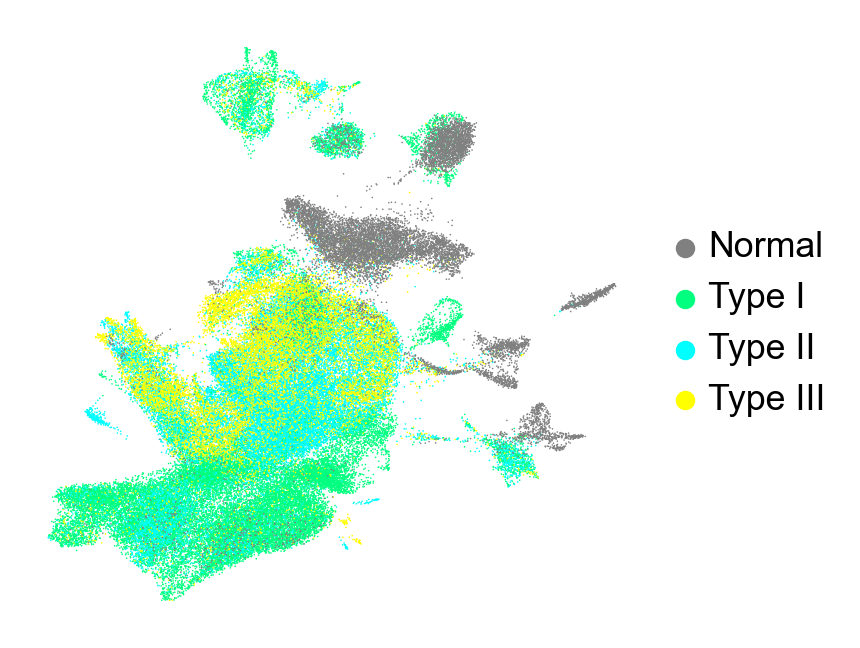

In [6]:
sc.pl.umap(adata, color=['type'] , legend_loc='right margin', frameon=False, title='', use_raw=False,
           palette={'Type I': 'springgreen', 'Type II': 'aqua','Type III': 'yellow','Normal': 'gray'})


filtered out 3491 genes that are detected in less than 25 cells


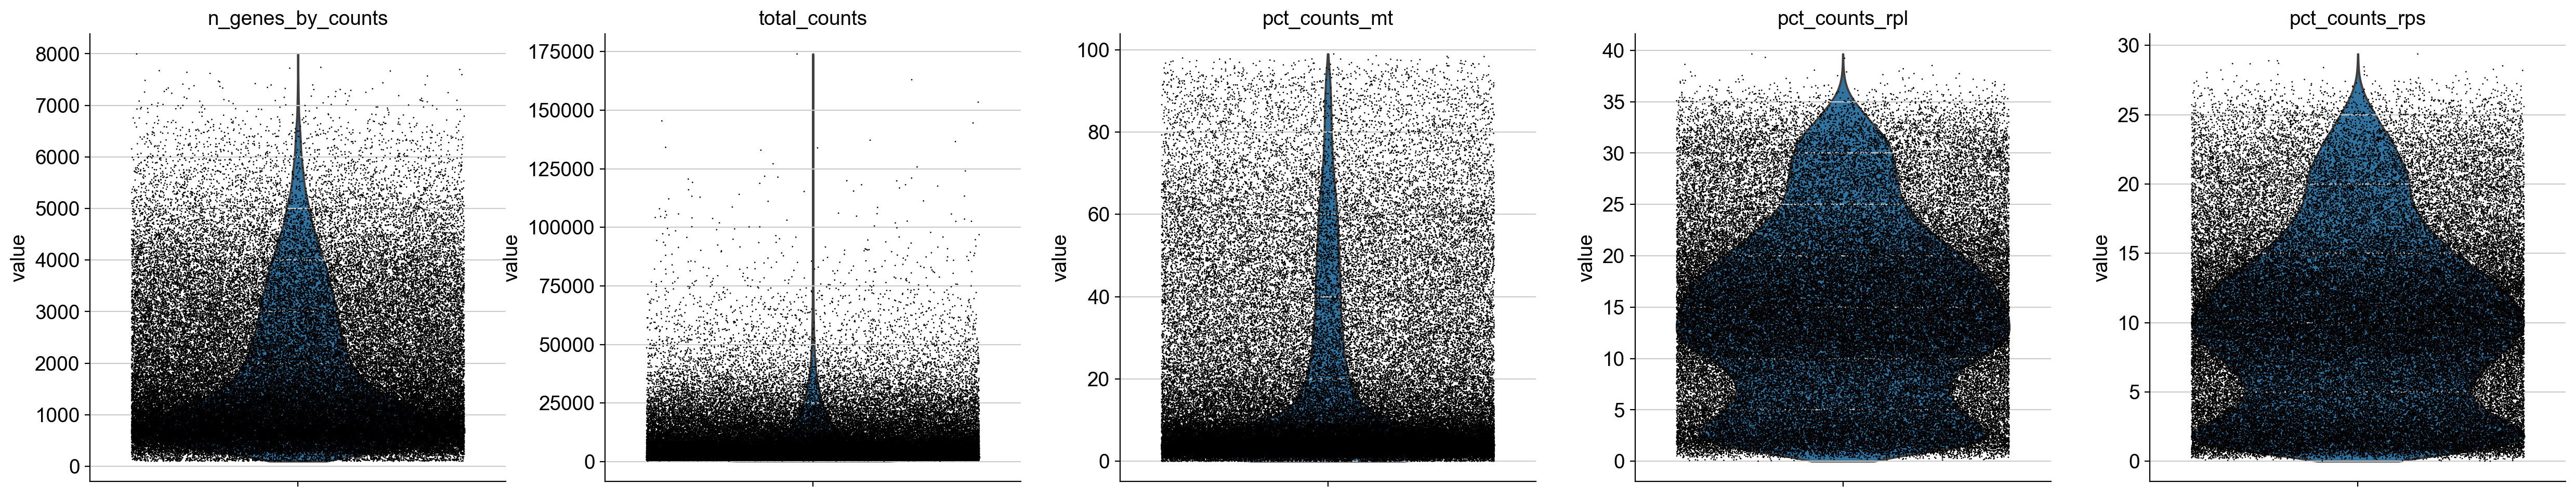

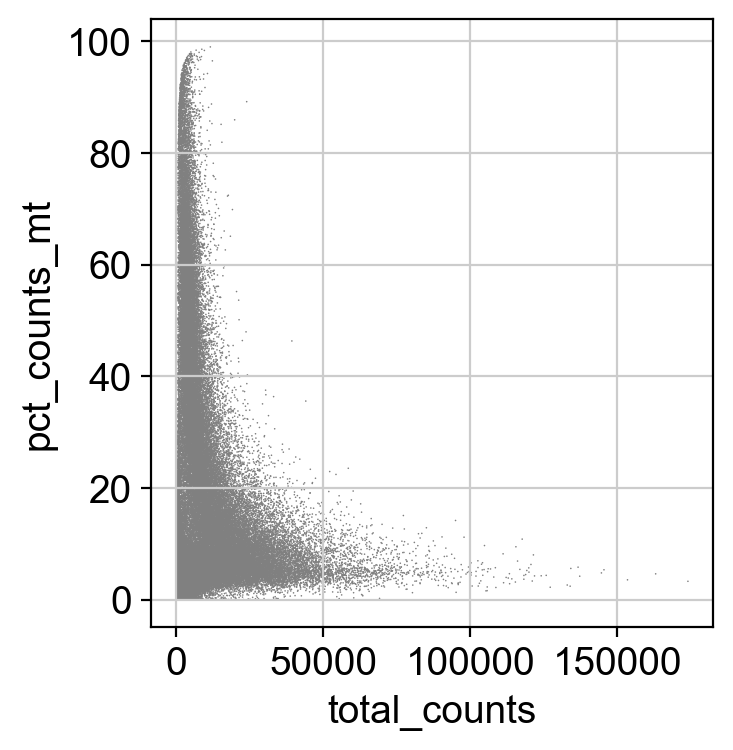

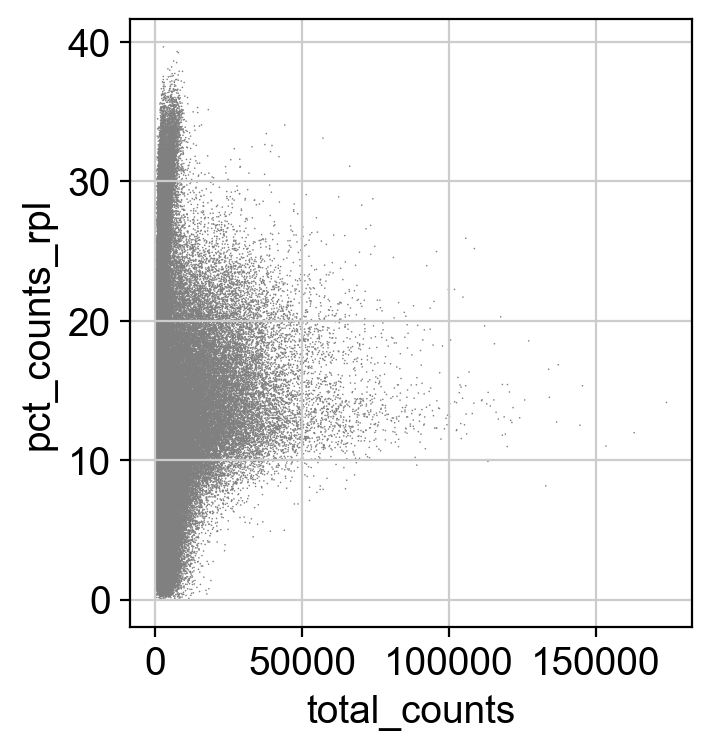

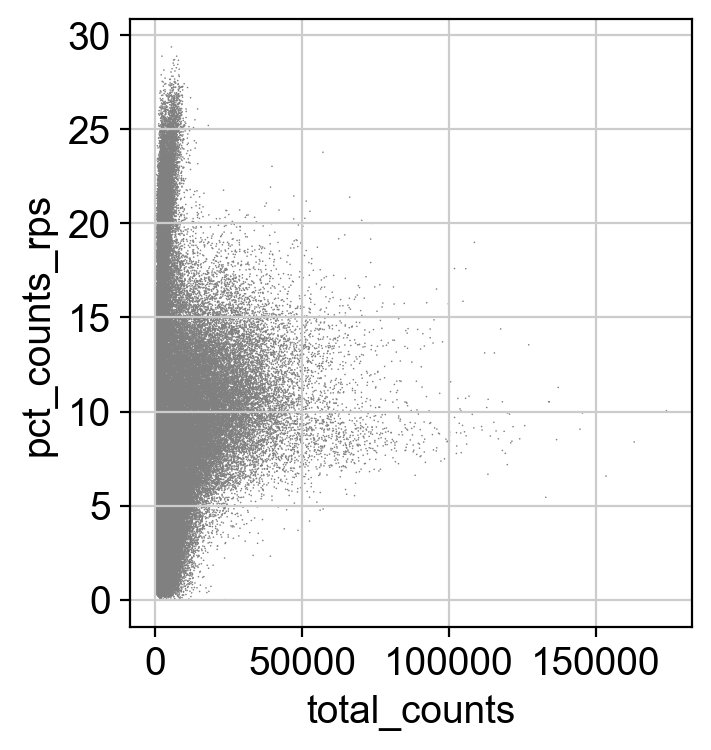

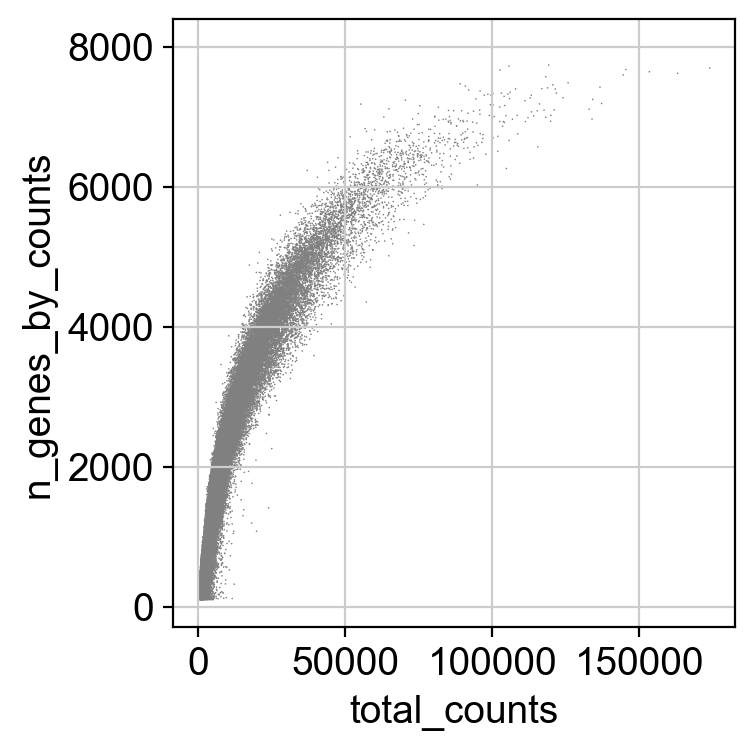

/Users/gzou/opt/anaconda3/envs/PY38/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


normalizing counts per cell
    finished (0:00:01)


AnnData object with n_obs × n_vars = 84338 × 16531
    obs: 'batch', 'leiden_1', 'type', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_rpl', 'pct_counts_rpl', 'total_counts_rps', 'pct_counts_rps'
    var: 'gene_ids-GSM4546300', 'gene_ids-GSM4546302', 'gene_ids-GSM4546304', 'gene_ids-GSM4546306', 'gene_ids-GSM4546308', 'gene_ids-GSM4546310', 'gene_ids-GSM4546312', 'gene_ids-GSM4546314', 'gene_ids-GSM4546316', 'gene_ids-GSM4546318', 'gene_ids-GSM4546320', 'gene_ids-GSM4546322', 'gene_ids-GSM4546324', 'gene_ids-GSM4546326', 'gene_ids-GSM4546328', 'gene_ids-GSM4546330', 'gene_ids-GSM4546332', 'gene_ids-GSM4546334', 'gene_ids-GSM4546336', 'gene_ids-GSM4546338', 'gene_ids-GSM4546340', 'gene_ids-GSM4546341', 'gene_ids-GSM4546343', 'gene_ids-GSM4546345', 'gene_ids-GSM4546347', 'gene_ids-GSM4546348', 'gene_ids-GSM4546349', 'gene_ids-GSM4546350', 'gene_ids-GSM4546351', 'gene_ids-IP_007', 'gene_ids-IP_009_1', 'gene_ids-IP_010_2', 'gene_ids-IP_03

In [7]:
sc.pp.filter_cells(adata, min_genes=100)
sc.pp.filter_genes(adata, min_cells=25)
adata.var['mt'] = adata.var_names.str.startswith('MT-')
adata.var['rpl'] = adata.var_names.str.startswith('RPL')
adata.var['rps'] = adata.var_names.str.startswith('RPS')

sc.pp.calculate_qc_metrics(adata, qc_vars=['mt','rpl','rps'], percent_top=None, log1p=False, inplace=True)
sc.pl.violin(adata, keys=['n_genes_by_counts', 'total_counts', 'pct_counts_mt','pct_counts_rpl','pct_counts_rps'], jitter=0.4, multi_panel=True)

sc.pl.scatter(adata, x='total_counts', y='pct_counts_mt')
sc.pl.scatter(adata, x='total_counts', y='pct_counts_rpl')
sc.pl.scatter(adata, x='total_counts', y='pct_counts_rps')
sc.pl.scatter(adata, x='total_counts', y='n_genes_by_counts')
adata = adata[adata.obs.n_genes_by_counts < 8000, :]
adata = adata[adata.obs.pct_counts_mt < 80, :]
adata = adata[adata.obs.pct_counts_rpl < 30, :]
adata = adata[adata.obs.pct_counts_rps < 25, :]

sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)
adata

In [8]:
cnv.io.genomic_position_from_gtf(gtf_file='/Users/gzou/OneDrive - Inside MD Anderson/SC33-Harada dataset/genes.gtf', adata=adata, gtf_gene_id='gene_name', inplace=True)

INFO:root:Extracted GTF attributes: ['gene_id', 'gene_name']


In [9]:
adata.var.loc[:, ["chromosome", "start", "end"]].head()

chromosome     start       end
AP006222.2       chr1  266855.0  268655.0
LINC00115        chr1  826206.0  827522.0
FAM41C           chr1  868071.0  876903.0
SAMD11           chr1  923928.0  944581.0
NOC2L            chr1  944203.0  959309.0

In [10]:
cnv.tl.infercnv(adata, reference_key='type', reference_cat='Normal', window_size = 100, step = 10, exclude_chromosomes={'chrMT'}, n_jobs=16)
adata

100%|██████████| 17/17 [04:53<00:00, 17.28s/it]  


AnnData object with n_obs × n_vars = 84338 × 16531
    obs: 'batch', 'leiden_1', 'type', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_rpl', 'pct_counts_rpl', 'total_counts_rps', 'pct_counts_rps'
    var: 'gene_ids-GSM4546300', 'gene_ids-GSM4546302', 'gene_ids-GSM4546304', 'gene_ids-GSM4546306', 'gene_ids-GSM4546308', 'gene_ids-GSM4546310', 'gene_ids-GSM4546312', 'gene_ids-GSM4546314', 'gene_ids-GSM4546316', 'gene_ids-GSM4546318', 'gene_ids-GSM4546320', 'gene_ids-GSM4546322', 'gene_ids-GSM4546324', 'gene_ids-GSM4546326', 'gene_ids-GSM4546328', 'gene_ids-GSM4546330', 'gene_ids-GSM4546332', 'gene_ids-GSM4546334', 'gene_ids-GSM4546336', 'gene_ids-GSM4546338', 'gene_ids-GSM4546340', 'gene_ids-GSM4546341', 'gene_ids-GSM4546343', 'gene_ids-GSM4546345', 'gene_ids-GSM4546347', 'gene_ids-GSM4546348', 'gene_ids-GSM4546349', 'gene_ids-GSM4546350', 'gene_ids-GSM4546351', 'gene_ids-IP_007', 'gene_ids-IP_009_1', 'gene_ids-IP_010_2', 'gene_ids-IP_03

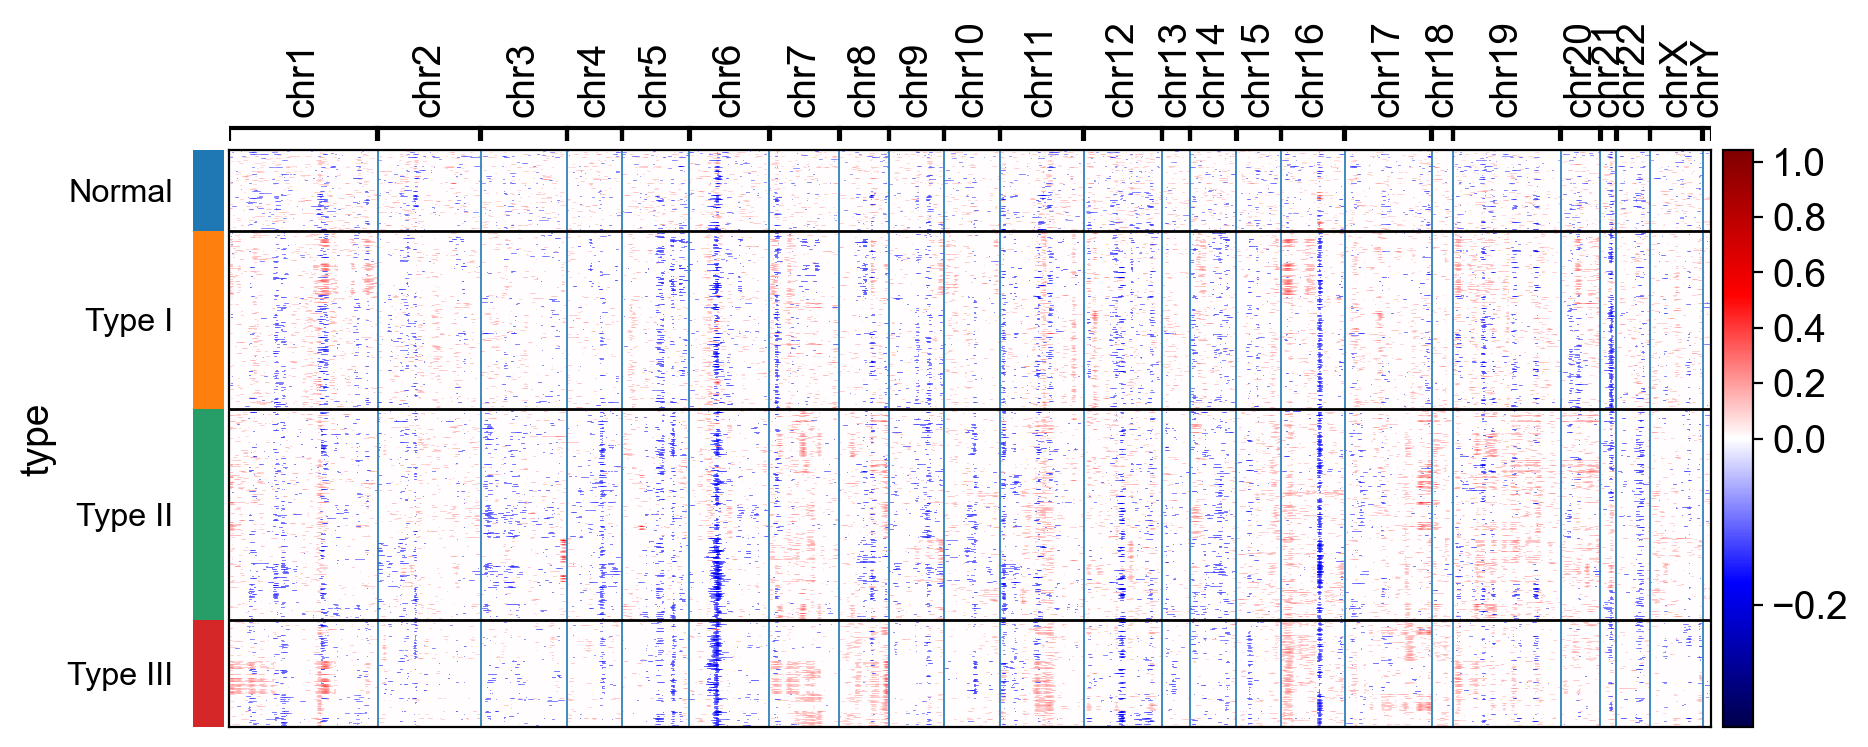

In [11]:
cnv.pl.chromosome_heatmap(adata, groupby="type", cmap='seismic', figsize=(10, 4), save='CNV.svg', dendrogram=False)

In [12]:
cnv.tl.pca(adata, svd_solver='arpack')
cnv.pp.neighbors(adata, n_neighbors=15, n_pcs=50, knn=True)
cnv.tl.leiden(adata, resolution=1)
cnv.tl.umap(adata)
cnv.tl.cnv_score(adata)
adata

computing PCA
    with n_comps=50
    finished (0:00:11)
computing neighbors
    finished: added to `.uns['cnv_neighbors']`
    `.obsp['cnv_neighbors_distances']`, distances for each pair of neighbors
    `.obsp['cnv_neighbors_connectivities']`, weighted adjacency matrix (0:00:46)
running Leiden clustering
    finished: found 26 clusters and added
    'cnv_leiden', the cluster labels (adata.obs, categorical) (0:00:18)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:01:28)


AnnData object with n_obs × n_vars = 84338 × 16531
    obs: 'batch', 'leiden_1', 'type', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_rpl', 'pct_counts_rpl', 'total_counts_rps', 'pct_counts_rps', 'cnv_leiden', 'cnv_score'
    var: 'gene_ids-GSM4546300', 'gene_ids-GSM4546302', 'gene_ids-GSM4546304', 'gene_ids-GSM4546306', 'gene_ids-GSM4546308', 'gene_ids-GSM4546310', 'gene_ids-GSM4546312', 'gene_ids-GSM4546314', 'gene_ids-GSM4546316', 'gene_ids-GSM4546318', 'gene_ids-GSM4546320', 'gene_ids-GSM4546322', 'gene_ids-GSM4546324', 'gene_ids-GSM4546326', 'gene_ids-GSM4546328', 'gene_ids-GSM4546330', 'gene_ids-GSM4546332', 'gene_ids-GSM4546334', 'gene_ids-GSM4546336', 'gene_ids-GSM4546338', 'gene_ids-GSM4546340', 'gene_ids-GSM4546341', 'gene_ids-GSM4546343', 'gene_ids-GSM4546345', 'gene_ids-GSM4546347', 'gene_ids-GSM4546348', 'gene_ids-GSM4546349', 'gene_ids-GSM4546350', 'gene_ids-GSM4546351', 'gene_ids-IP_007', 'gene_ids-IP_009_1', 'gene_ids

... storing 'chromosome' as categorical
... storing 'gene_id' as categorical
... storing 'gene_name' as categorical


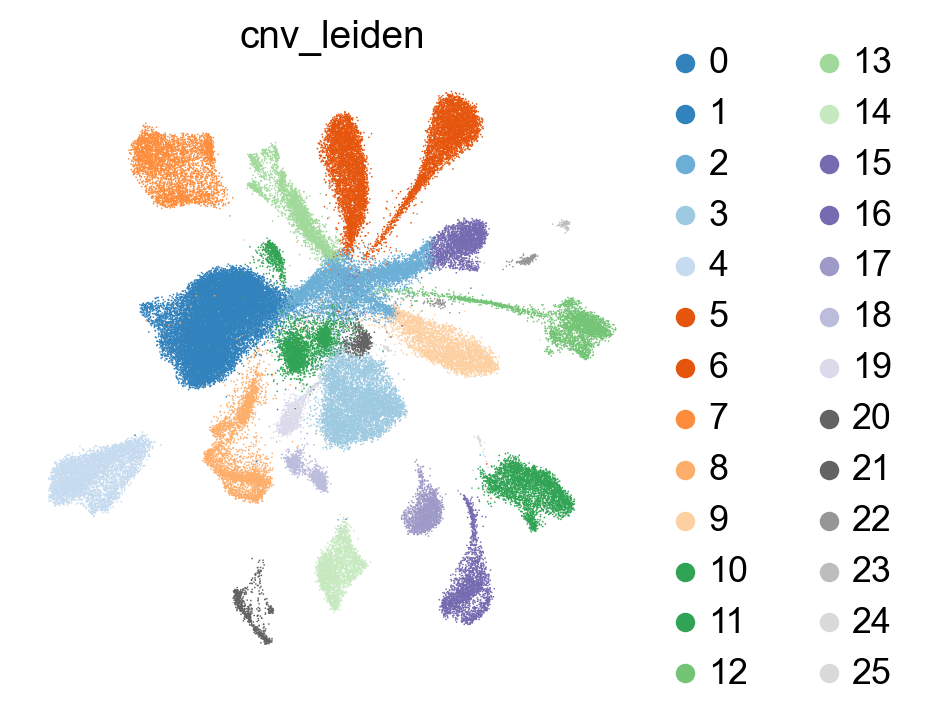

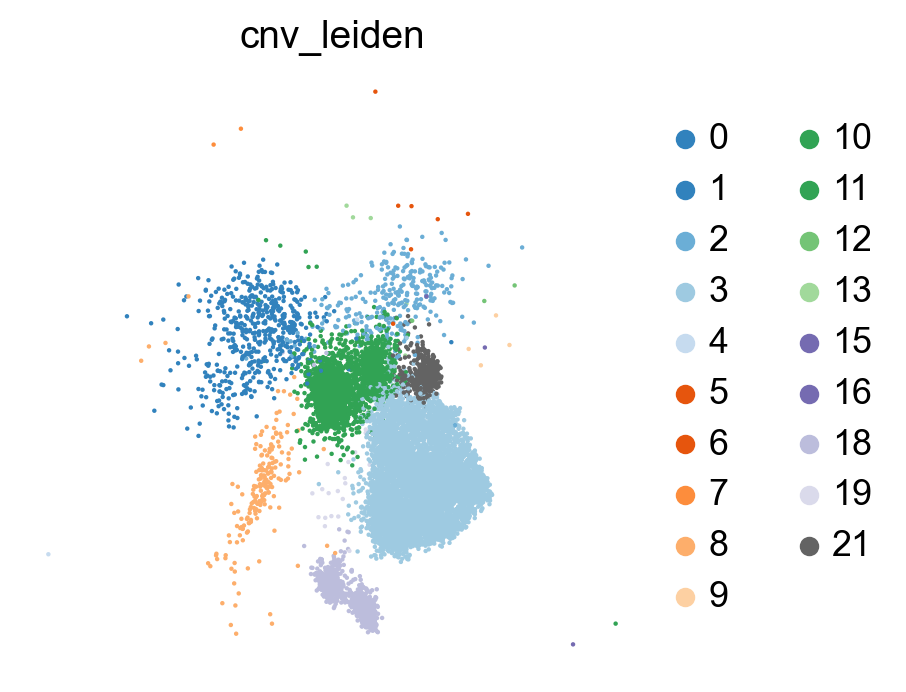

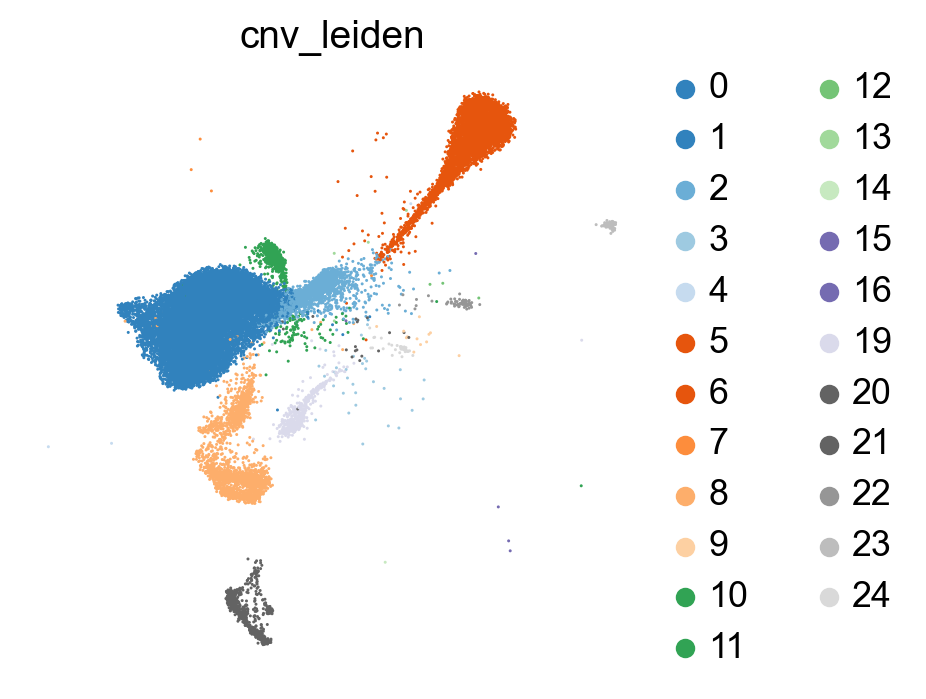

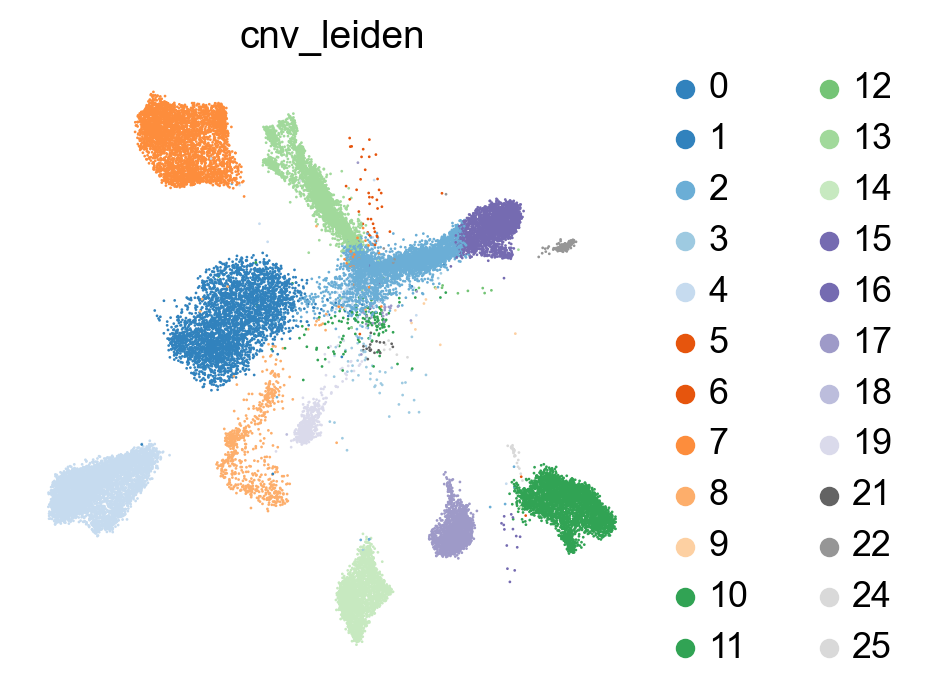

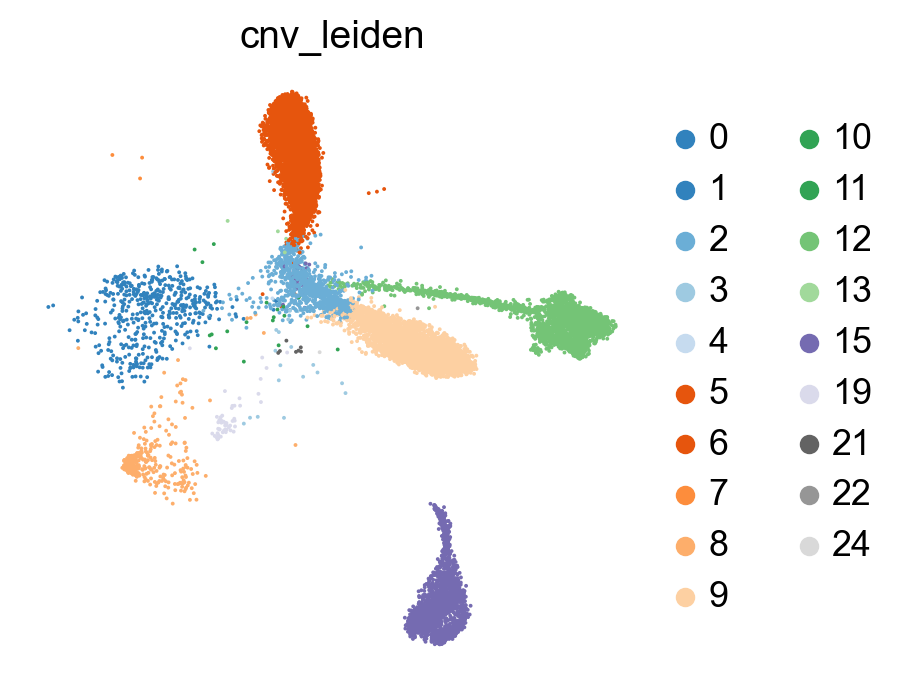

In [13]:
# reUMAP the cells based on 'cnv_leiden' calculated from cnv matrix
cnv.pl.umap(adata, color="cnv_leiden", use_raw=None, frameon=False, legend_loc='right margin', palette='tab20c',save='cnvleiden_all')
cnv.pl.umap(adata[adata.obs['type']=='Normal'], color="cnv_leiden", use_raw=None, frameon=False, legend_loc='right margin',save='cnvleiden_normal')
cnv.pl.umap(adata[adata.obs['type']=='Type I'], color="cnv_leiden", use_raw=None, frameon=False, legend_loc='right margin',save='cnvleiden_type I')
cnv.pl.umap(adata[adata.obs['type']=='Type II'], color="cnv_leiden", use_raw=None, frameon=False, legend_loc='right margin',save='cnvleiden_type II')
cnv.pl.umap(adata[adata.obs['type']=='Type III'], color="cnv_leiden", use_raw=None, frameon=False, legend_loc='right margin',save='cnvleiden_type III')

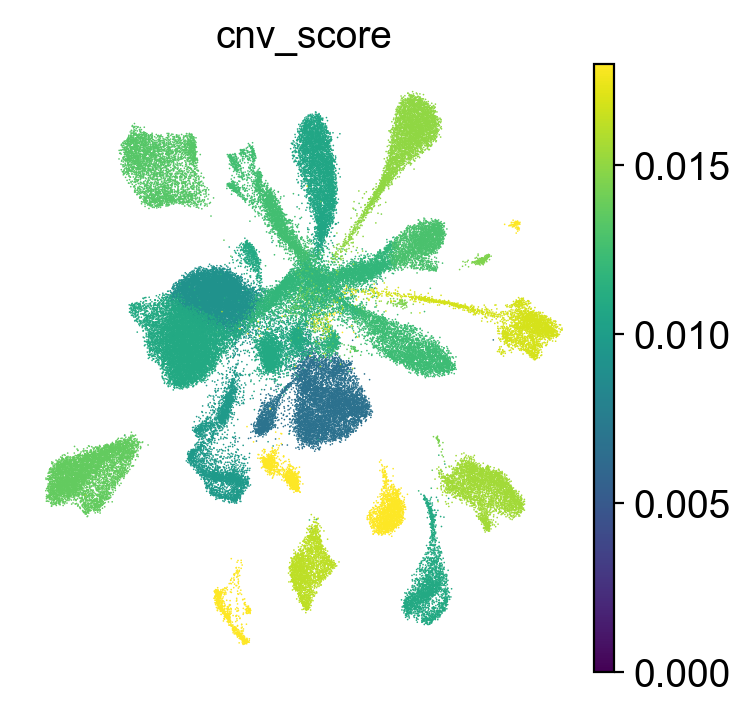

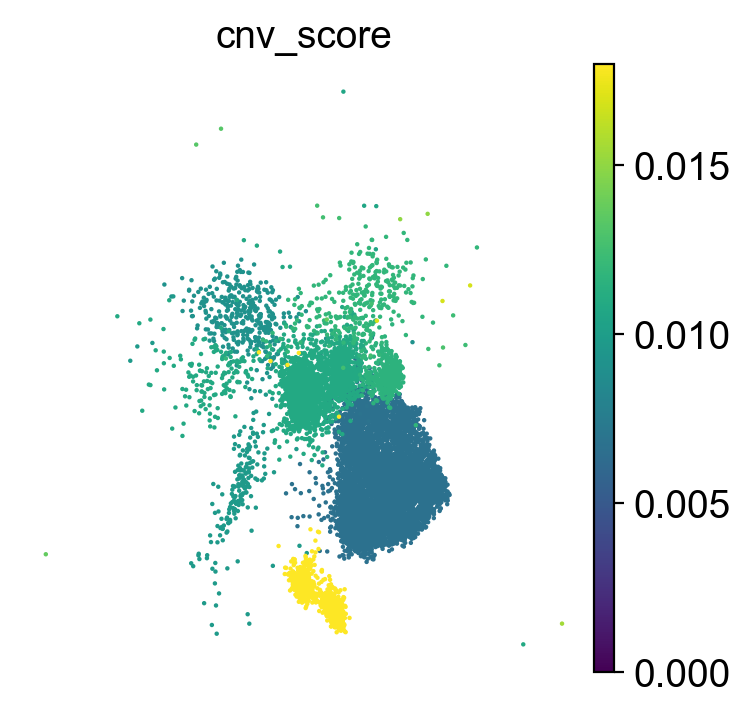

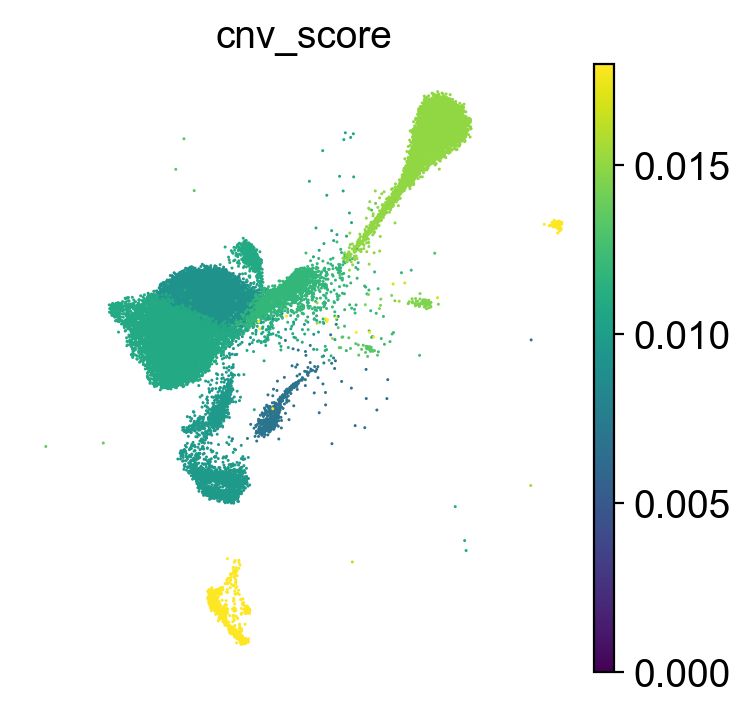

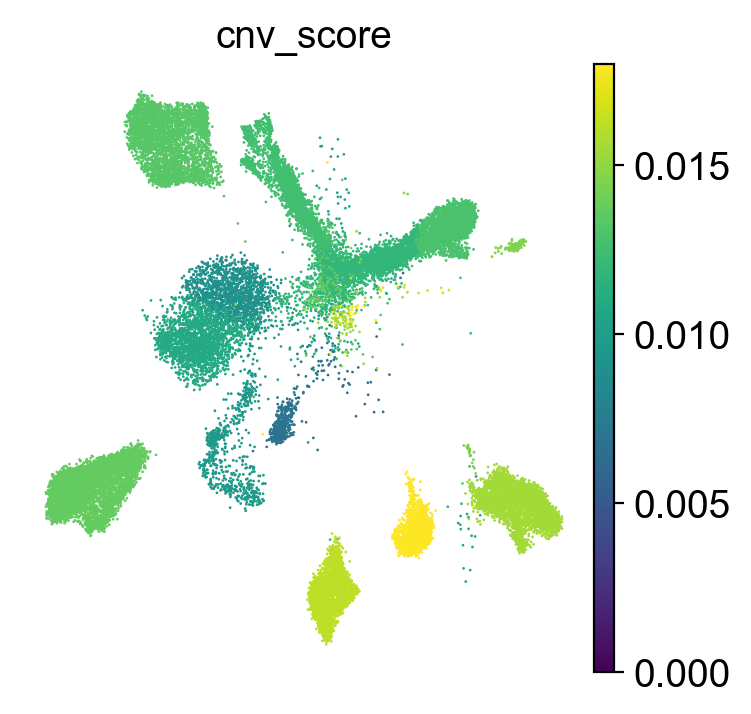

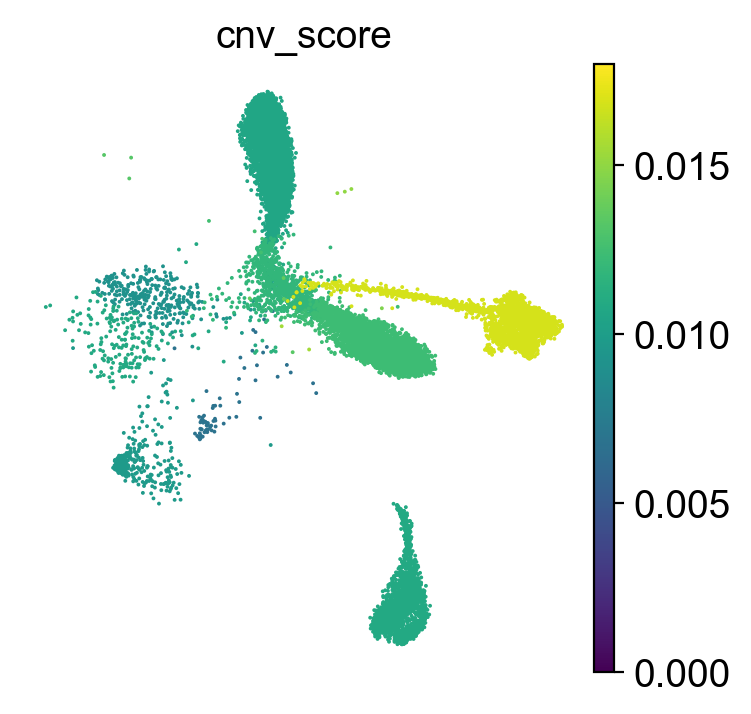

In [14]:
# show the cnv_score on UMAP, higher cnv_score, more cnv
cnv.pl.umap(adata, color="cnv_score", use_raw=None, frameon=False,vmin=0, vmax=0.018,save='cnvscore_all')
cnv.pl.umap(adata[adata.obs['type']=='Normal'], color="cnv_score", use_raw=None, frameon=False, vmin=0, vmax=0.018,save='cnvscore_normal')
cnv.pl.umap(adata[adata.obs['type']=='Type I'], color="cnv_score", use_raw=None, frameon=False, vmin=0, vmax=0.018,save='cnvscore_TypeI')
cnv.pl.umap(adata[adata.obs['type']=='Type II'], color="cnv_score", use_raw=None, frameon=False, vmin=0,  vmax=0.018,save='cnvscore_TypeII')
cnv.pl.umap(adata[adata.obs['type']=='Type III'], color="cnv_score", use_raw=None, frameon=False, vmin=0, vmax=0.018,legend_loc='right margin',save='cnvscore_type III')

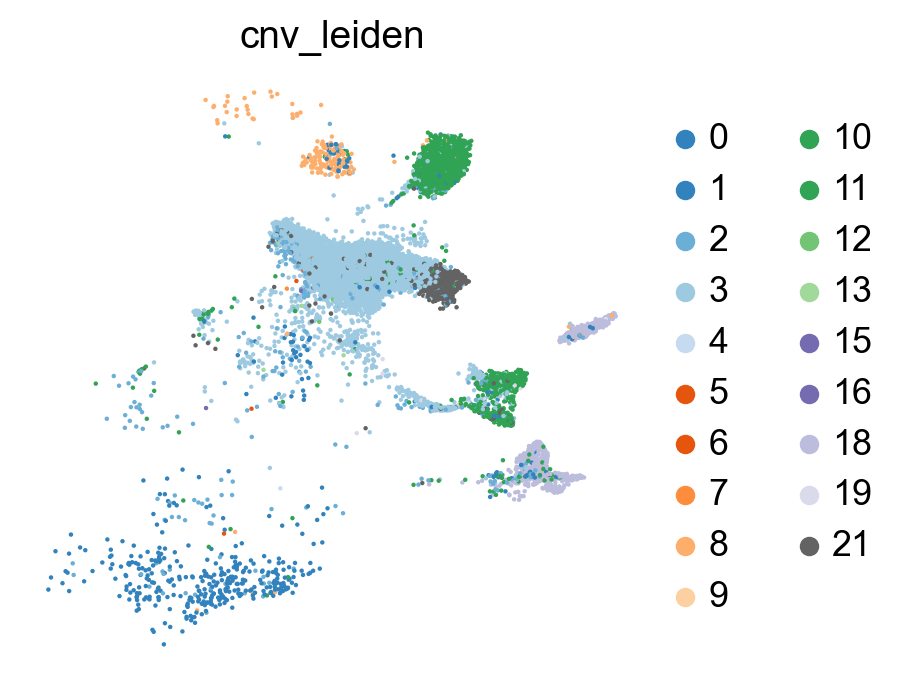

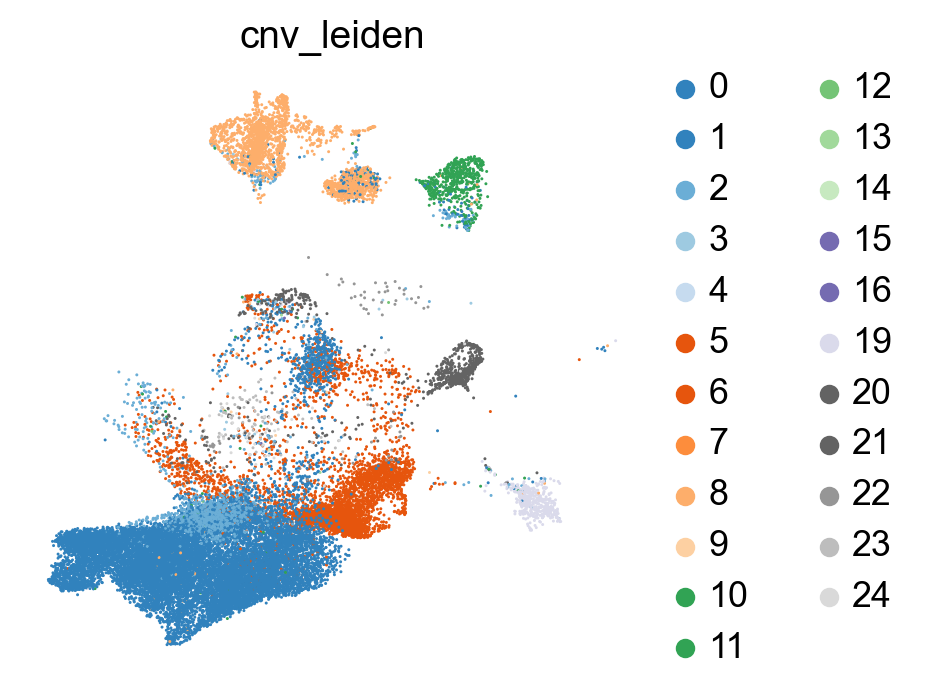

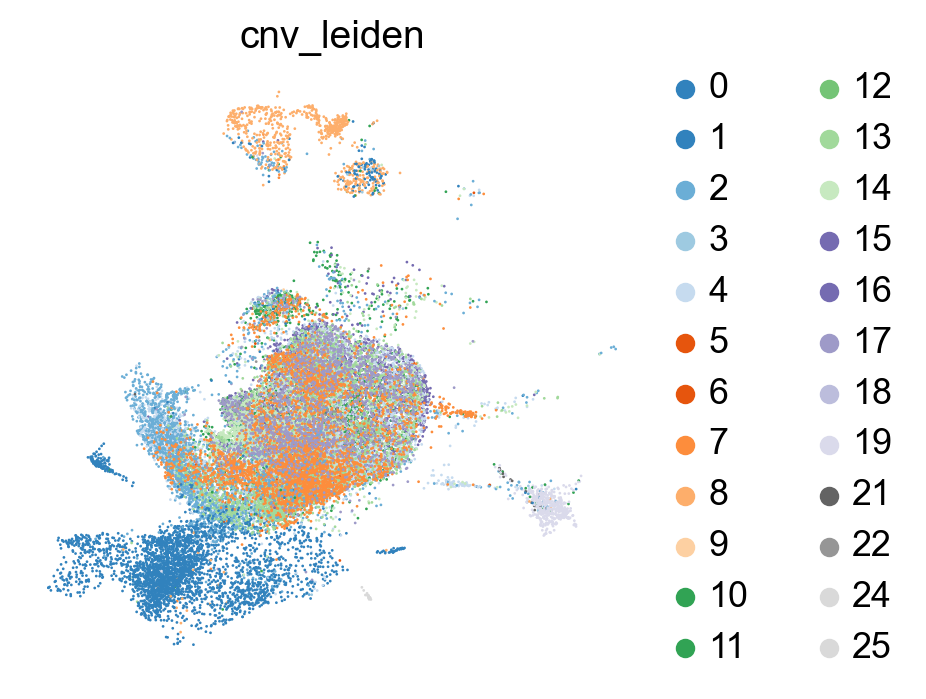

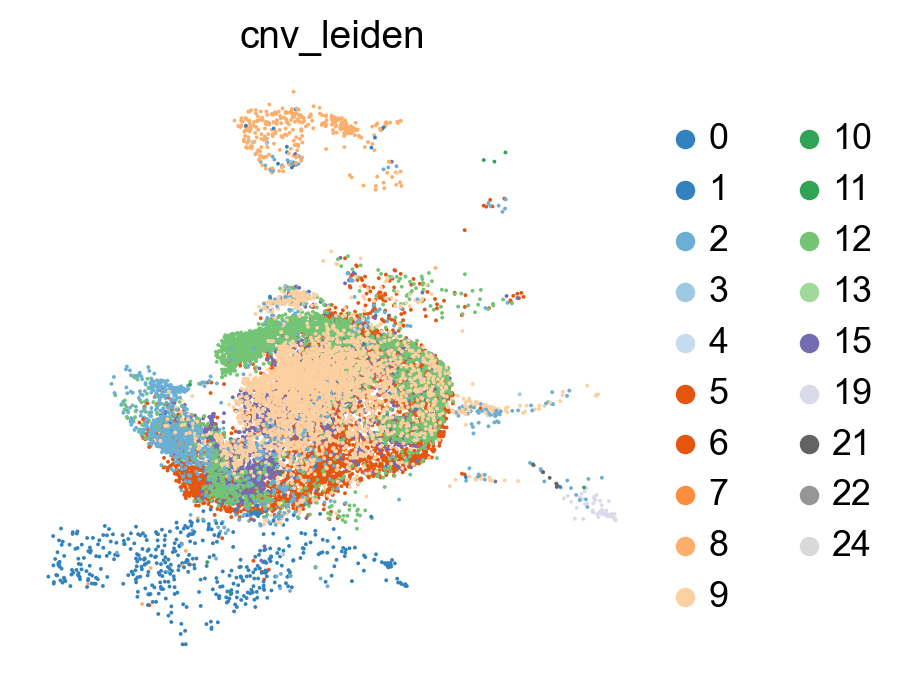

In [41]:
# visuallize the 'cnv_leiden' and 'cnv score' on the orginal 'cell_type' UMAP
sc.pl.umap(adata[adata.obs['type']=='Normal'], color="cnv_leiden", use_raw=None, frameon=False, legend_loc='right margin', save='cnvleiden_in_normal_UMAP')
sc.pl.umap(adata[adata.obs['type']=='Type I'], color="cnv_leiden", use_raw=None, frameon=False, legend_loc='right margin', save='cnvleiden_in_typeI_UMAP')
sc.pl.umap(adata[adata.obs['type']=='Type II'], color="cnv_leiden", use_raw=None, frameon=False, legend_loc='right margin', save='cnvleiden_in_typeII_UMAP')
sc.pl.umap(adata[adata.obs['type']=='Type III'], color="cnv_leiden", use_raw=None, frameon=False, legend_loc='right margin', save='cnvleiden_in_typeIII_UMAP')

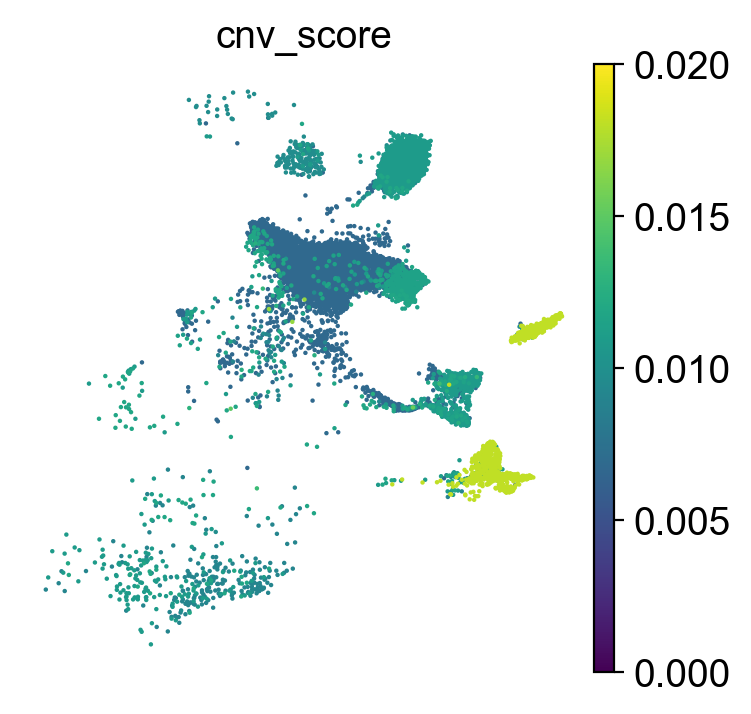

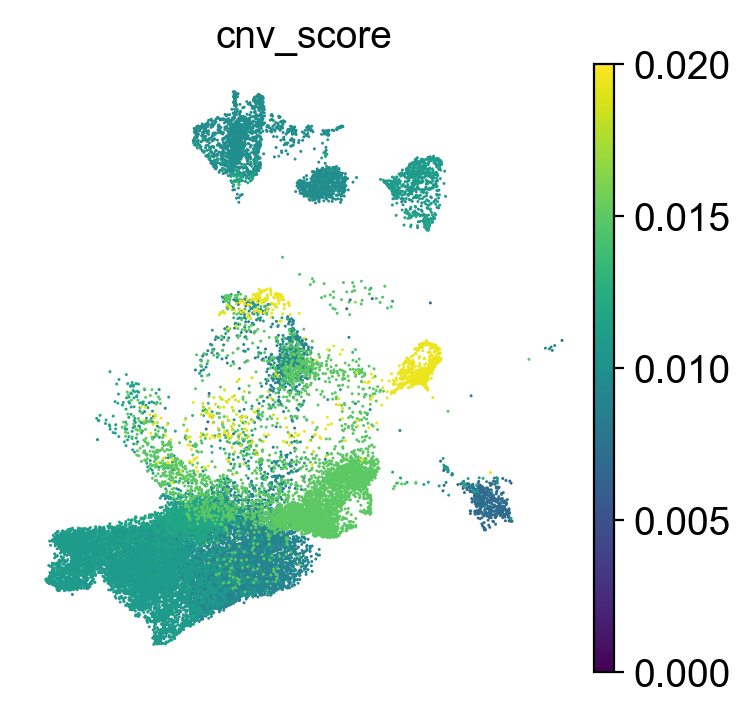

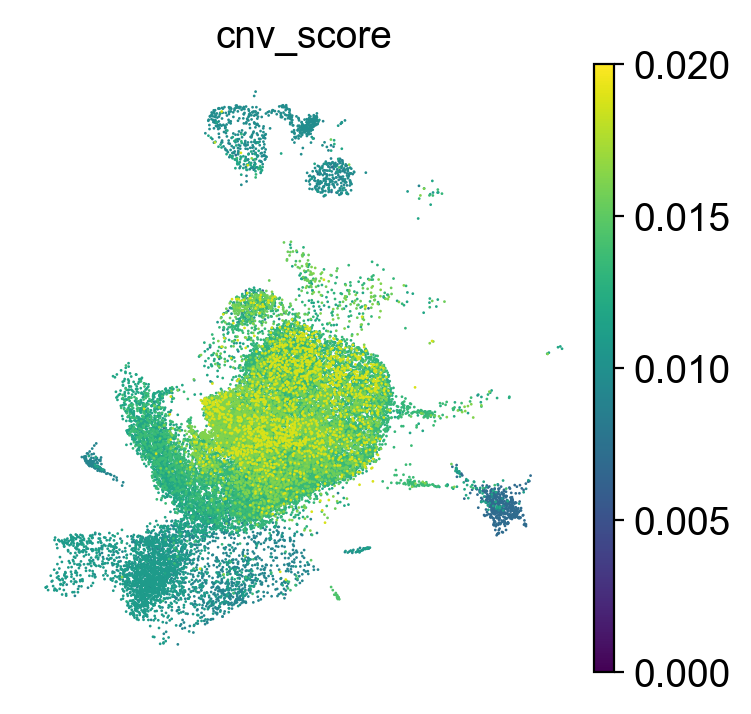

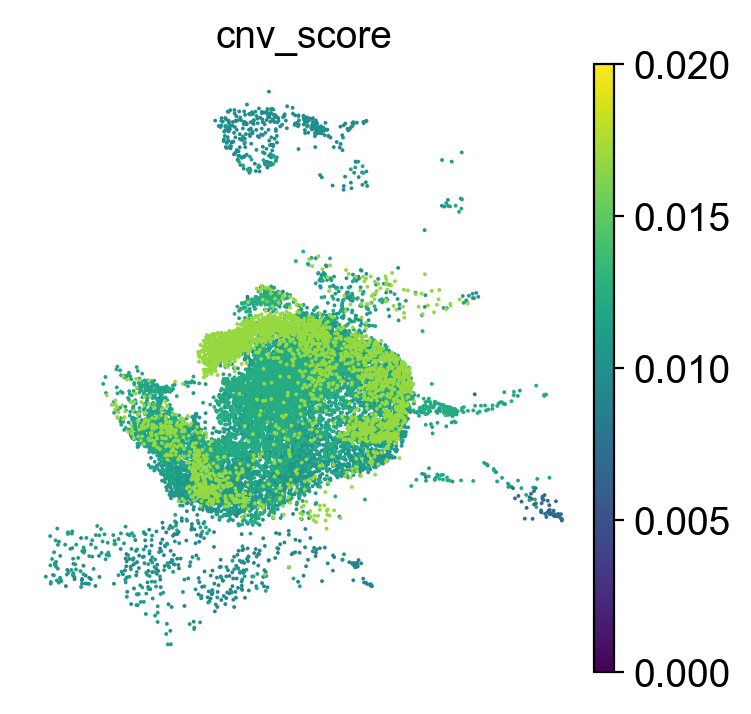

In [42]:
# visuallize the 'cnv_leiden' and 'cnv score' on the orginal 'cell_type' UMAP
sc.pl.umap(adata[adata.obs['type']=='Normal'], color="cnv_score", use_raw=None, frameon=False, vmin=0, vmax=0.02, save='cnvscore_in_normal_UMAP')
sc.pl.umap(adata[adata.obs['type']=='Type I'], color="cnv_score", use_raw=None, frameon=False, vmin=0, vmax=0.02, save='cnvscore_in_typeI_UMAP')
sc.pl.umap(adata[adata.obs['type']=='Type II'], color="cnv_score", use_raw=None, frameon=False, vmin=0, vmax=0.02, save='cnvscore_in_typeII_UMAP')
sc.pl.umap(adata[adata.obs['type']=='Type III'], color="cnv_score", use_raw=None, frameon=False, vmin=0, vmax=0.02, save='cnvscore_in_typeIII_UMAP')


In [16]:
adata.obs.to_csv('/Users/gzou/OneDrive - Inside MD Anderson/Data from Dr. Ajani Lab/scripts/figures/inferCNV.csv')